In [25]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We are going to use the Iris data set

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

Add column of scpecies (aka y)

In [8]:
df['species'] = [iris.target_names[x] for x in iris.target]

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
print 'Class labels: \n%s' % iris.target_names

Class labels: 
['setosa' 'versicolor' 'virginica']


In [14]:
print 'Independent variables: \n%s' % iris.feature_names

Independent variables: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


##Classification using KNN

In [17]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, feature_selection

In [20]:
# We need to define some variables to start our modelling
n_neighbours = range(1, 51, 2)

# We need random numbers, BUT we want to be able to provide reproducibility
np.random.seed(123)



In [22]:
# Load the data
x = iris.data
y = iris.target

# We would like to create our training set.
n = int(len(y) * 0.7)

In [29]:
# Stack array in sequence horizontally with hstack

ind = np.hstack((np.ones(n, dtype = np.bool), np.zeros(len(y) - n, dtype = np.bool)))

In [30]:
np.random.shuffle(ind)

In [31]:
X_train, X_test = x[ind], x[ind==False]
Y_train, Y_test = y[ind], y[ind==False]

In [32]:
score = []
for k in n_neighbours:
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, Y_train)
    score.append(clf.score(X_test, Y_test))

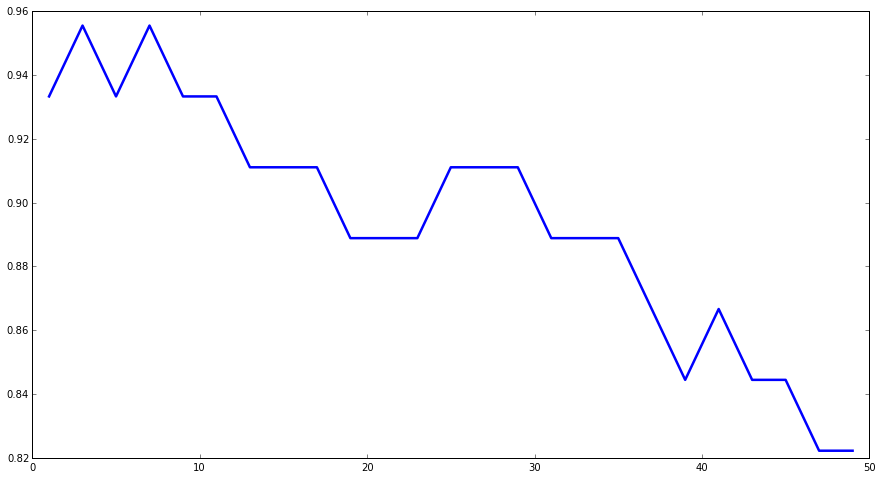

In [39]:
figure(figsize = (15,8))
plot(n_neighbours, score, linewidth = 2.5)

[0.91111111111111109, 0.91111111111111109, 0.9555555555555556, 0.97777777777777775, 0.97777777777777775]
0.946666666667


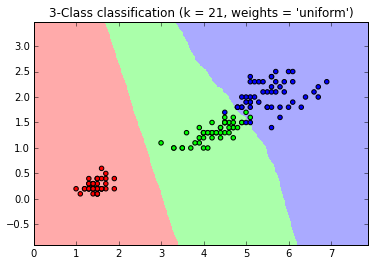

In [54]:
scores = []
for k in range(5):
    np.random.shuffle(ind)
    X_train, X_test = x[ind], x[ind == False]
    y_train, y_test = y[ind], y[ind == False]
    clf = neighbors.KNeighborsClassifier(21, weights='uniform')
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    
print scores
print np.mean(scores)

feature_selection.f_classif(x, y)

h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00', '#0000FF'])

clf = neighbors.KNeighborsClassifier(21, weights = 'uniform')
clf.fit(x[:, 2:4], y)

x_min, x_max = x[:, 2].min() - 1, x[:, 2].max() + 1
y_min, y_max = x[:, 3].min() - 1, x[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

plt.scatter(x[:, 2], x[:, 3], c=y, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (21, 'uniform'))

plt.show()